# AI Lista 4 - Problem klasyfikacji szkła

#### Zuzanna Sikorska, 260464

Zbiór danych: https://archive.ics.uci.edu/ml/datasets/Glass+Identification

Trochę danych o atrybutach:
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
                  are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      - 1 building_windows_float_processed
      - 2 building_windows_non_float_processed
      - 3 vehicle_windows_float_processed
      - 4 vehicle_windows_non_float_processed (none in this database)
      - 5 containers
      - 6 tableware
      - 7 headlamps

#### Przydatne importy:

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import warnings 
warnings.filterwarnings('ignore')

#### Eksploracja danych:

Wczytanie danych

In [132]:
data = pd.read_csv('glass.data', names=['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'class'])
data.shape

(214, 11)

In [133]:
data.drop('Id', axis=1, inplace=True)
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Sprawdzenie, czy są braki danych

In [134]:
pd.isnull(data).sum()

RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
class    0
dtype: int64

Sprawdzenie typów danych

In [135]:
data.dtypes

RI       float64
Na       float64
Mg       float64
Al       float64
Si       float64
K        float64
Ca       float64
Ba       float64
Fe       float64
class      int64
dtype: object

Wypisanie podstawowych statystyk o danych

In [136]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Liczności poszczególnych klas

In [137]:
data['class'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: class, dtype: int64

Wizualizacja licznosci poszczególnych klas

<AxesSubplot:xlabel='class', ylabel='count'>

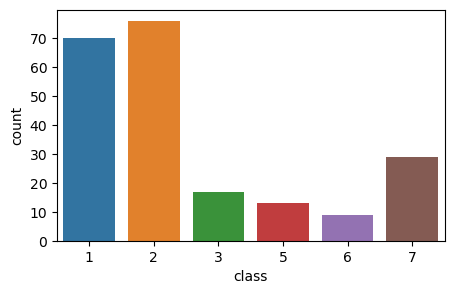

In [138]:
plt.figure(figsize=[5,3])
sns.countplot(data["class"])

Wystepują znaczne różnice w licznościach klas.

Wizualizacja rozkładu poszczególnych zmiennych w ramach zbioru danych. Dla każdej zmiennej, na osi poziomej przedstawiony jest zakres wartości, a na osi pionowej gęstość prawdopodobieństwa.

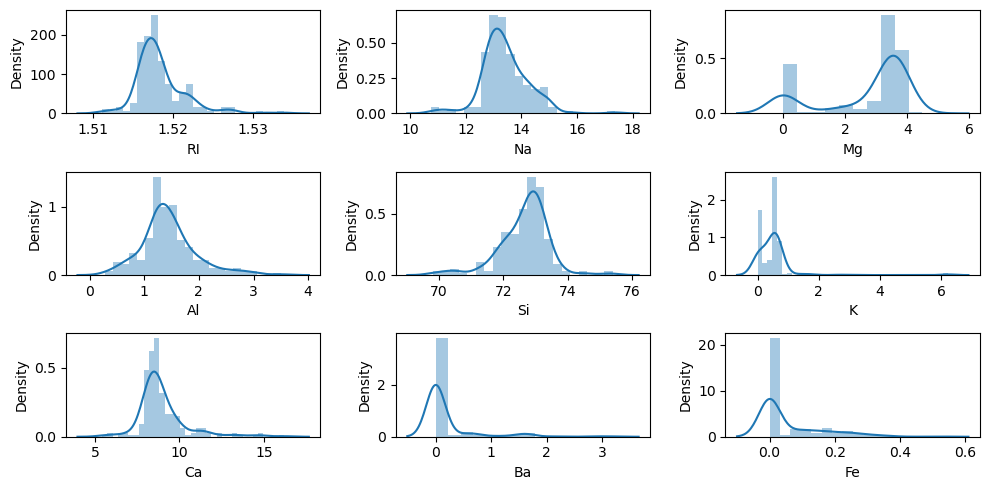

In [139]:
plt.figure(figsize=[10,5])

for i in range(0, 9):
    plt.subplot(3, 3, i + 1)
    sns.distplot(data.iloc[:, i])
    plt.tight_layout()



Wizualizacja pokazująca różnice w rozkładach wartości numerycznych między różnymi klasami w zbiorze danych. Na osi pionowej przedstawione są wartości numeryczne danej cechy, a na osi poziomej przedstawione są wystepujace w zbiorze klasy. Dla każdej cechy, pudełko wykresu przedstawia interkwartylne zakresy wartości, linia wewnątrz pudełka oznacza medianę, a wąsy przedstawiają rozstęp wartości (różnica między największą a najmniejszą wartością w zbiorze danych). Dodatkowo, punkty lub krzyże mogą reprezentować wartości odstające.

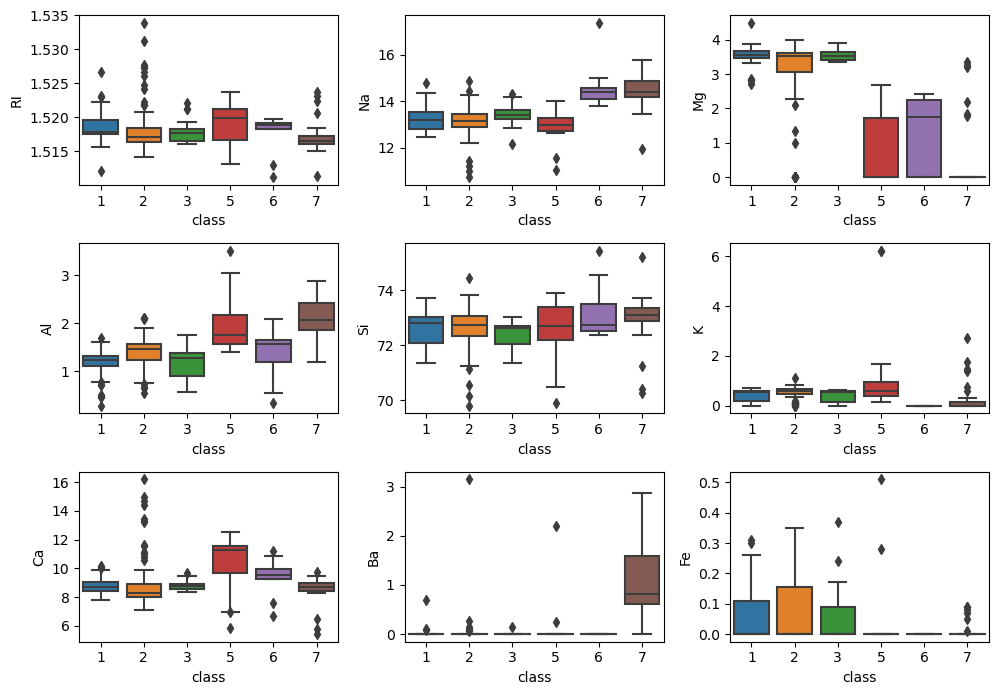

In [140]:
plt.figure(figsize=[10, 7])
numeric_features = data.select_dtypes(include=['float64', 'int64']).drop('class', axis=1).columns.tolist()
num_cols = len(numeric_features)
for i in range(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='class', y=numeric_features[i], data=data)
plt.tight_layout()
plt.show()


Wykres ten pokazał, że wartości niektórych cech są bardzo podobne dla różnych klas (np. RI, Si), ale występują też cechy, dla których na przykład wartości dla jednej/kilku klasy są znacznie wyróżniające się na tle pozostałych (np. Mg, Ba) - takie cechy mogą być przydatne przy klasyfikacji.

#### Przygotowanie danych:

In [141]:
X=data.drop("class", axis = 1) 
y=data["class"]

Poszukiwanie dobrego staosunku podziału zbioru na zbiór treningowy i testowy. 

In [142]:
test_sizes = [.1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7]
results = pd.DataFrame(columns=['test_size', 'accuracy GNB', 'accuracy DT'])

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=21)
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred_gnb = gnb.predict(X_test)
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    results = results.append({'test_size': test_size, 'accuracy GNB': accuracy_score(y_test, y_pred_gnb), 'accuracy DT': accuracy_score(y_test, y_pred_dt)}, ignore_index=True)

results


,test_size,accuracy GNB,accuracy DT
0,0.10,0.681818,0.545455
1,0.15,0.575758,0.545455
2,0.20,0.441860,0.720930
3,0.25,0.407407,0.722222
4,0.30,0.430769,0.661538
5,0.35,0.413333,0.640000
6,0.40,0.500000,0.639535
7,0.45,0.556701,0.690722
8,0.50,0.551402,0.710280
9,0.55,0.550847,0.677966


Najlepszy rezultat zmienia się za każdym razem gdy na nowo losujemy kolejność wierszy z danymi. Dlatego też, aby uzyskać jak najbardziej wiarygodne wyniki, należy powtórzyć eksperyment kilkukrotnie i uśrednić wyniki.

In [143]:
results = pd.DataFrame(columns=['test_size', 'accuracy GNB', 'accuracy DT'])

for i in range(10):
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=21)
        gnb = GaussianNB()
        gnb.fit(X_train, y_train)
        y_pred_gnb = gnb.predict(X_test)
        dt = DecisionTreeClassifier()
        dt.fit(X_train, y_train)
        y_pred_dt = dt.predict(X_test)
        results = results.append({'test_size': test_size, 'accuracy GNB': accuracy_score(y_test, y_pred_gnb), 'accuracy DT': accuracy_score(y_test, y_pred_dt)}, ignore_index=True)

results.groupby('test_size').mean()


,accuracy GNB,accuracy DT
test_size,,
0.10,0.681818,0.613636
0.15,0.575758,0.642424
0.20,0.441860,0.704651
0.25,0.407407,0.712963
0.30,0.430769,0.675385
0.35,0.413333,0.673333
0.40,0.500000,0.641860
0.45,0.556701,0.680412
0.50,0.551402,0.694393


Eksperyment nie jest jednoznaczny, jeden z najlepszych wyników został osiągany dla podziału 80/20 (zbiór treningowy/testowy). Ten podział zostanie wykorzystany w następnych eksperymentach.

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((171, 9), (171,), (43, 9), (43,))

Standaryzacja danych - jest to przekształcenia wartości cech w taki sposób, aby miały średnią wartość równą 0 i odchylenie standardowe równa 1. Polega ona na odjęciu średniej wartości cechy od każdej obserwacji, a następnie podzieleniu jej przez odchylenie standardowe. Dzięki temu standaryzacja danych przekształca rozkład cech w taki sposób, że mają one zbliżone skale i jednostki, co ułatwia porównywanie i analizę danych. 

In [145]:
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

Normalizacja danych - skalowania wartości cech tak, aby każda obserwacja miała długość równą 1. Dzięki temu, wartości cech są przekształcane w sposób, który zachowuje proporcje między nimi, niezależnie od ich skal. Jest to przydatne, gdy chcemy porównywać względne proporcje między różnymi cechami lub obserwacjami, niezależnie od ich oryginalnych wartości.

In [146]:
normalizer = Normalizer()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

Funkcja przydatna przy pokazywaniu wyników klasyfikacji.

In [147]:
def test_classifier(cls, X_train, y_train, X_test, y_test):
    cls.fit(X_train, y_train)
    y_pred = cls.predict(X_test)

    accuracy_score_test = accuracy_score(y_test, y_pred)
    precision_score_test = precision_score(y_test, y_pred, average='weighted')
    recall_score_test = recall_score(y_test, y_pred, average='weighted')
    f1_score_test = f1_score(y_test, y_pred, average='weighted')

    results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    results.loc[cls.__class__.__name__] = [accuracy_score_test, precision_score_test, recall_score_test, f1_score_test]

    print(results, "\n")

    # Confusion matrix
    confusion_matrix_test = confusion_matrix(y_test, y_pred)
    print("Confusion matrix: \n", confusion_matrix(y_test, y_pred), "\n")


    # Classification report
    print("Classification report: \n", classification_report(y_test, y_pred), "\n")

    return results, confusion_matrix_test


#### Porównanie metod przetwarzających dane:

In [148]:
print("Naive Bayes Classifier:")
print("------------------------\n")

results_gnb_proc_df = pd.DataFrame(columns=['Experiment', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print("Pure data:")
print("----------------------------------------------------------------\n")
results_gnb_proc, _ = test_classifier(GaussianNB(), X_train, y_train, X_test, y_test)
results_gnb_proc['Experiment'] = 'Pure data'
results_gnb_proc_df = results_gnb_proc_df.append(results_gnb_proc, ignore_index=True)

print("With Standardization:")
print("----------------------------------------------------------------\n")
results_gnb_proc, _ = test_classifier(GaussianNB(), X_train_standardized, y_train, X_test_standardized, y_test)
results_gnb_proc['Experiment'] = 'Standardization'
results_gnb_proc_df = results_gnb_proc_df.append(results_gnb_proc, ignore_index=True)

print("With Normalization:")
print("----------------------------------------------------------------\n")
results_gnb_proc, _ = test_classifier(GaussianNB(), X_train_normalized, y_train, X_test_normalized, y_test)
results_gnb_proc['Experiment'] = 'Normalization'
results_gnb_proc_df = results_gnb_proc_df.append(results_gnb_proc, ignore_index=True)
print("\n")

Naive Bayes Classifier:
------------------------

Pure data:
----------------------------------------------------------------

            Accuracy  Precision   Recall  F1 Score
GaussianNB   0.44186   0.440476  0.44186  0.413577 

Confusion matrix: 
 [[10  1  4  0  0  0]
 [ 8  3  2  2  1  0]
 [ 2  0  2  0  1  0]
 [ 0  3  0  0  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  3]] 

Classification report: 
               precision    recall  f1-score   support

           1       0.50      0.67      0.57        15
           2       0.43      0.19      0.26        16
           3       0.25      0.40      0.31         5
           5       0.00      0.00      0.00         3
           6       0.33      1.00      0.50         1
           7       1.00      1.00      1.00         3

    accuracy                           0.44        43
   macro avg       0.42      0.54      0.44        43
weighted avg       0.44      0.44      0.41        43
 

With Standardization:
----------------------------

In [149]:
results_gnb_proc_df.sort_values(by=['Accuracy', 'Precision', 'F1 Score'], ascending=False)

,Experiment,Accuracy,Precision,Recall,F1 Score
0,Pure data,0.44186,0.440476,0.44186,0.413577
1,Standardization,0.44186,0.440476,0.44186,0.413577
2,Normalization,0.44186,0.407145,0.44186,0.393290


Procesowanie danych nie pomogło w uzyskaniu lepszych wyników klasyfikacji. Wyniki są takie same, jak w przypadku, gdy nie stosowano żadnego przetwarzania danych. W przypadku normalizacji danych, wyniki są nieco gorsze (precyzja). Można również zauważyć różnice w macierzy pomyłek (zwłaszcza dla klasy 2, normalizacja ma inne trafienia) Ogólnie wyniki klasyfikatora Bayesa nie są zbyt dobre (mniej niż 50% trafień). Na plus idealna dokładność dla klasy 6 i 7, za to fatalna dla klasy 2 i 5.

In [150]:
print("Decision Tree Classifier:")
print("------------------------\n")

results_dt_proc_df = pd.DataFrame(columns=['Experiment', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print("Pure data:")
print("----------------------------------------------------------------\n")
results_dt_proc, _ = test_classifier(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)
results_dt_proc['Experiment'] = 'Pure data'
results_dt_proc_df = results_dt_proc_df.append(results_dt_proc, ignore_index=True)

print("With Standardization:")
print("----------------------------------------------------------------\n")
results_dt_proc, _ = test_classifier(DecisionTreeClassifier(), X_train_standardized, y_train, X_test_standardized, y_test)
results_dt_proc['Experiment'] = 'Standardization'
results_dt_proc_df = results_dt_proc_df.append(results_dt_proc, ignore_index=True)

print("With Normalization:")
print("----------------------------------------------------------------\n")
results_dt_proc, _ = test_classifier(DecisionTreeClassifier(), X_train_normalized, y_train, X_test_normalized, y_test)
results_dt_proc['Experiment'] = 'Normalization'
results_dt_proc_df = results_dt_proc_df.append(results_dt_proc, ignore_index=True)
print("\n")

Decision Tree Classifier:
------------------------

Pure data:
----------------------------------------------------------------

                        Accuracy  Precision    Recall  F1 Score
DecisionTreeClassifier  0.674419   0.689746  0.674419  0.670199 

Confusion matrix: 
 [[ 8  4  2  0  1  0]
 [ 2 12  0  1  1  0]
 [ 1  2  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  3]] 

Classification report: 
               precision    recall  f1-score   support

           1       0.73      0.53      0.62        15
           2       0.67      0.75      0.71        16
           3       0.50      0.40      0.44         5
           5       0.75      1.00      0.86         3
           6       0.33      1.00      0.50         1
           7       1.00      1.00      1.00         3

    accuracy                           0.67        43
   macro avg       0.66      0.78      0.69        43
weighted avg       0.69      0.67      0.67        43
 

With Standardization:


In [151]:
results_dt_proc_df.sort_values(by=['Accuracy', 'Precision', 'F1 Score'], ascending=False)

,Experiment,Accuracy,Precision,Recall,F1 Score
2,Normalization,0.720930,0.723064,0.720930,0.714402
1,Standardization,0.697674,0.648837,0.697674,0.662237
0,Pure data,0.674419,0.689746,0.674419,0.670199


Wyniki dla klasyfikatora drzewa decyzyjnego są znacznie lepsze niż dla klasyfikatora Bayesa. W wypadku tego klasyfikatora procesowanie danych przyniosło poprawę wyników. Wystepują różnice w macierzy pomyłek między poszczególnymi metodami przetwarzania danych. Zmiana klasyfikatora (a zwłaszcza z użyciem normalizacji) znacznie poprawiła wyniki dla klasy 2 i 5, jednak klasa 3 wciąż stanowi problem.

#### Porównanie skuteczności hiperparametrów:

In [152]:
param_gnb = {'var_smoothing': np.logspace(0, -10, num=100)}

grid_search_gnb = GridSearchCV(GaussianNB(), param_gnb, scoring='accuracy', cv=5)
print("Best parameters for Gaussian Naive Bayes: ", grid_search_gnb.fit(X_train, y_train).best_params_, "\n")

Best parameters for Gaussian Naive Bayes:  {'var_smoothing': 0.012045035402587823} 



Wizualizacja pokazująca dokładność klasyfikatora Bayesa w zależności od hiperparametru 'var_smoothing' (umożliwia dodanie małej wartości do wariancji wszystkich cech, która wygładza wariancje i pomaga uniknąć problemu zerowych lub niskich wariancji, które skutkują problemami w wyliczaniu prawdopodobieństw).

Best var_smoothing value:  0.0007390722033525783 



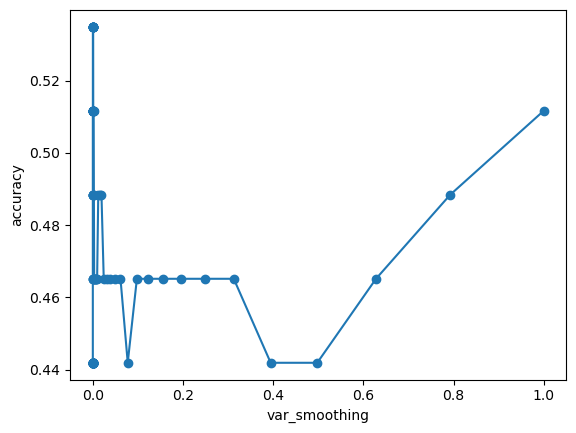

In [153]:

acc_scores = []
var_smoothing_values = param_gnb['var_smoothing']

for var_smoothing in var_smoothing_values:
    clf = GaussianNB(var_smoothing=var_smoothing)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_scores.append(acc)


best_var_smoothing = var_smoothing_values[np.argmax(acc_scores)]
print("Best var_smoothing value: ", best_var_smoothing, "\n")


plt.plot(var_smoothing_values, acc_scores, marker='o')
plt.xlabel('var_smoothing')
plt.ylabel('accuracy')
plt.show()

In [185]:
param_dt_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 5),
}

grid_search_dt = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = param_dt_grid, cv = 5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
print("Best parameters: ", grid_search_dt.best_params_)

Best parameters:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [186]:
best_params = grid_search_dt.best_params_
criterion = best_params['criterion']
max_depth = best_params['max_depth']
min_samples_split = best_params['min_samples_split']
min_samples_leaf = best_params['min_samples_leaf']

Wizuazlizacja pokazująca dokładność klasyfikatora drzewa decyzyjnego w zależności od hiperparametru 'criterion' (kryterium podziału w węźle drzewa).

Best criterion value:  entropy 



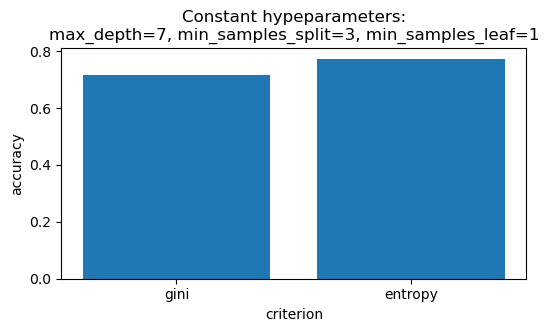

In [187]:
criterion_values = ['gini', 'entropy']
acc_scores_criterion = []

for criterion_val in criterion_values:
    acc_scores = []
    for _ in range(100):
        clf = DecisionTreeClassifier(criterion=criterion_val, max_depth=max_depth,
                                     min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        acc_scores.append(acc)
    acc_scores_criterion.append(np.mean(acc_scores))

best_criterion = criterion_values[np.argmax(acc_scores_criterion)]
print("Best criterion value: ", best_criterion, "\n")

plt.figure(figsize=(6, 3))
plt.bar(criterion_values, acc_scores_criterion)
plt.xlabel('criterion')
plt.ylabel('accuracy')
plt.title('Constant hypeparameters:\nmax_depth={}, min_samples_split={}, min_samples_leaf={}'.format(max_depth, min_samples_split, min_samples_leaf))
plt.show()

Wizualizacja pokazująca dokładność klasyfikatora drzewa decyzyjnego w zależności od hiperparametru 'max_depth' (maksymalna głębokość drzewa).

Best max_depth value:  6 



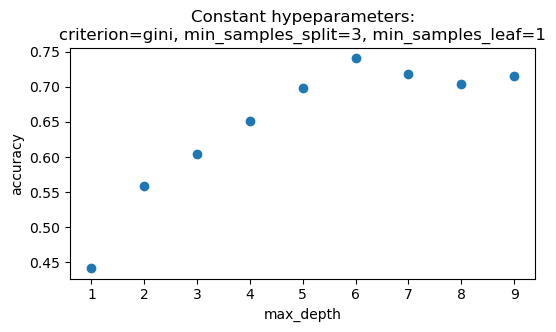

In [188]:
max_depth_values = range(1, 10)
acc_scores_max_depth = []

for max_depth_val in max_depth_values:
    acc_scores = []
    for _ in range(100):
        clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth_val,
                                 min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        acc_scores.append(acc)
    acc_scores_max_depth.append(np.mean(acc_scores))

best_max_depth = max_depth_values[np.argmax(acc_scores_max_depth)]
print("Best max_depth value: ", best_max_depth, "\n")

plt.figure(figsize=(6, 3))
plt.scatter(max_depth_values, acc_scores_max_depth, marker='o')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Constant hypeparameters:\ncriterion={}, min_samples_split={}, min_samples_leaf={}'.format(criterion, min_samples_split, min_samples_leaf))
plt.show()

Wizualizacja pokazująca dokładność klasyfikatora drzewa decyzyjnego w zależności od hiperparametru 'min_samples_split' (minimalna liczba próbek wymagana do podziału węzła).

Best min_samples_split value:  8 



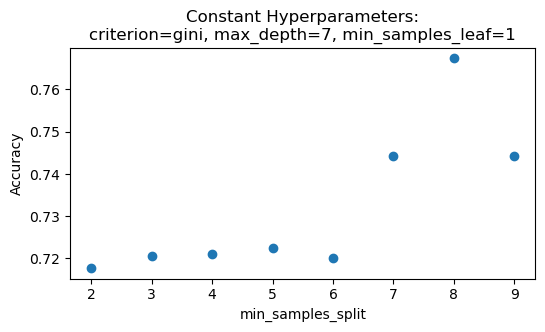

In [189]:
acc_scores_min_samples_split = []
min_samples_split_values = range(2, 10)

for min_samples_split_val in min_samples_split_values:
    acc_scores = []
    for _ in range(100):
        clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,
                                     min_samples_split=min_samples_split_val, min_samples_leaf=min_samples_leaf)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        acc_scores.append(acc)
    acc_scores_min_samples_split.append(np.mean(acc_scores))

best_min_samples_split = min_samples_split_values[np.argmax(acc_scores_min_samples_split)]
print("Best min_samples_split value: ", best_min_samples_split, "\n")

plt.figure(figsize=(6, 3))
plt.scatter(min_samples_split_values, acc_scores_min_samples_split, marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.title('Constant Hyperparameters:\ncriterion={}, max_depth={}, min_samples_leaf={}'.format(criterion, max_depth, min_samples_leaf))
plt.show()

Wizualizacja pokazująca dokładność klasyfikatora drzewa decyzyjnego w zależności od hiperparametru 'min_samples_leaf' (minimalna liczba próbek wymagana do znalezienia liścia).

Best min_samples_leaf value:  2 



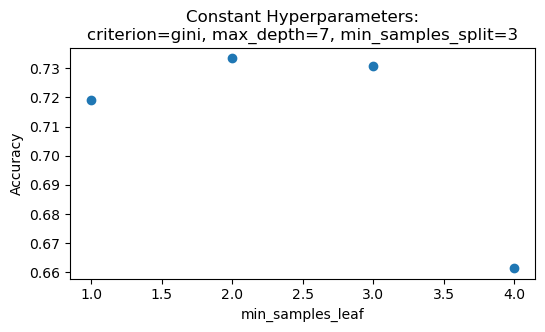

In [190]:
acc_scores_min_samples_leaf = []
min_samples_leaf_values = range(1, 5)

for min_samples_leaf_val in min_samples_leaf_values:
    acc_scores = []
    for _ in range(100):
        clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,
                                     min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf_val)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        acc_scores.append(acc)
    acc_scores_min_samples_leaf.append(np.mean(acc_scores))

best_min_samples_leaf = min_samples_leaf_values[np.argmax(acc_scores_min_samples_leaf)]
print("Best min_samples_leaf value: ", best_min_samples_leaf, "\n")

plt.figure(figsize=(6, 3))
plt.scatter(min_samples_leaf_values, acc_scores_min_samples_leaf, marker='o')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Constant Hyperparameters:\ncriterion={}, max_depth={}, min_samples_split={}'.format(criterion, max_depth, min_samples_split))
plt.show()

#### Porównanie skuteczności klasyfikatorów przy kilku zestawach parametrów:

In [191]:
params_gnb = [{'var_smoothing': grid_search_gnb.best_params_['var_smoothing']},
              {'var_smoothing': best_var_smoothing},
              {'var_smoothing': 1e-9},] # default value

# delete duplicates
params_gnb = [dict(t) for t in {tuple(d.items()) for d in params_gnb}]
params_gnb


[{'var_smoothing': 0.012045035402587823},
 {'var_smoothing': 1e-09},
 {'var_smoothing': 0.0007390722033525783}]

In [192]:
params_dt = [{'criterion': grid_search_dt.best_params_['criterion'],
                'max_depth': grid_search_dt.best_params_['max_depth'],
                'min_samples_split': grid_search_dt.best_params_['min_samples_split'],
                'min_samples_leaf': grid_search_dt.best_params_['min_samples_leaf']},
                {'criterion': best_criterion,
                 'max_depth': grid_search_dt.best_params_['max_depth'],
                'min_samples_split': grid_search_dt.best_params_['min_samples_split'],
                'min_samples_leaf': grid_search_dt.best_params_['min_samples_leaf']},
                {'criterion': grid_search_dt.best_params_['criterion'],
                'max_depth': best_max_depth,
                'min_samples_split': grid_search_dt.best_params_['min_samples_split'],
                'min_samples_leaf': grid_search_dt.best_params_['min_samples_leaf']},
                {'criterion': grid_search_dt.best_params_['criterion'],
                'max_depth': grid_search_dt.best_params_['max_depth'],
                'min_samples_split': best_min_samples_split,
                'min_samples_leaf': grid_search_dt.best_params_['min_samples_leaf']},
                {'criterion': grid_search_dt.best_params_['criterion'],
                'max_depth': grid_search_dt.best_params_['max_depth'],
                'min_samples_split': grid_search_dt.best_params_['min_samples_split'],
                'min_samples_leaf': best_min_samples_leaf},
                {'criterion': best_criterion,
                 'max_depth': best_max_depth,
                 'min_samples_split': best_min_samples_split,
                 'min_samples_leaf': best_min_samples_leaf},
                {'criterion': 'gini',
                 'max_depth': None,
                 'min_samples_split': 2,
                 'min_samples_leaf': 1}] # default values


# delete duplicates
params_dt = [dict(t) for t in {tuple(d.items()) for d in params_dt}]
params_dt

[{'criterion': 'entropy',
  'max_depth': 7,
  'min_samples_split': 3,
  'min_samples_leaf': 1},
 {'criterion': 'gini',
  'max_depth': None,
  'min_samples_split': 2,
  'min_samples_leaf': 1},
 {'criterion': 'gini',
  'max_depth': 7,
  'min_samples_split': 3,
  'min_samples_leaf': 1},
 {'criterion': 'gini',
  'max_depth': 7,
  'min_samples_split': 8,
  'min_samples_leaf': 1},
 {'criterion': 'entropy',
  'max_depth': 6,
  'min_samples_split': 8,
  'min_samples_leaf': 2},
 {'criterion': 'gini',
  'max_depth': 7,
  'min_samples_split': 3,
  'min_samples_leaf': 2},
 {'criterion': 'gini',
  'max_depth': 6,
  'min_samples_split': 3,
  'min_samples_leaf': 1}]

In [176]:
# Gaussian Naive Bayes Classifier
print("Gaussian Naive Bayes Classifier:")
print("------------------------\n")

results_gnb_df = pd.DataFrame(columns=['var_smoothing', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

for params in params_gnb:
    print("Parameter set:", params)
    print("----------------------------------------------------------------\n")
    clf = GaussianNB(**params)
    results_gnb, _ = test_classifier(clf, X_train, y_train, X_test, y_test)
    results_gnb['var_smoothing'] = params['var_smoothing']
    results_gnb_df = results_gnb_df.append(results_gnb, ignore_index=True)
    print("\n")


Gaussian Naive Bayes Classifier:
------------------------

Parameter set: {'var_smoothing': 0.012045035402587823}
----------------------------------------------------------------

            Accuracy  Precision    Recall  F1 Score
GaussianNB  0.488372   0.435846  0.488372  0.408739 

Confusion matrix: 
 [[14  0  1  0  0  0]
 [10  3  0  2  1  0]
 [ 5  0  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  3]] 

Classification report: 
               precision    recall  f1-score   support

           1       0.48      0.93      0.64        15
           2       0.50      0.19      0.27        16
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         3
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         3

    accuracy                           0.49        43
   macro avg       0.41      0.52      0.43        43
weighted avg       0.44      0.49      0.41        4

In [177]:
results_gnb_df.sort_values(by=['Accuracy', 'Precision'], ascending=False)

,var_smoothing,Accuracy,Precision,Recall,F1 Score
2,7.390722e-04,0.534884,0.535153,0.534884,0.498368
0,1.204504e-02,0.488372,0.435846,0.488372,0.408739
1,1.000000e-09,0.441860,0.440476,0.441860,0.413577


Najbardziej dokładny jest klasyfikator Bayesa dla hiperparametru 'var_smoothing' równego 7.390722e-04 (czyli znaleziony przez sprawdzanie wszystkich wartości ze 100 próbek wybranych przez np.logspace(0, -10, num=100)). Najgorzej wypada domyślna wartość tego hipermarametru (1e-09). Problemy wystąpiły dla klasy 5, gdzie klasyfikator nie przewidział żadnej obserwacji tej klasy. Wygrywająca wartość hiperparametru zyskała pzrewagę przez lepszą dokładność dla klasy 1 niż wartość wybrana jako najlepsza przez grid search oraz dla klasy 3 w stosunku do wartości domyślnej.

In [193]:
# Decision Tree Classifier
print("Decision Tree Classifier:")
print("------------------------\n")

results_dt_df = pd.DataFrame(columns=['criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

for params in params_dt:
    print("Parameter set:", params)
    print("----------------------------------------------------------------\n")
    clf = DecisionTreeClassifier(**params)
    results_dt, _ = test_classifier(clf, X_train, y_train, X_test, y_test)
    results_dt['criterion'] = params['criterion']
    results_dt['max_depth'] = params['max_depth']
    results_dt['min_samples_split'] = params['min_samples_split']
    results_dt['min_samples_leaf'] = params['min_samples_leaf']
    results_dt_df = results_dt_df.append(results_dt, ignore_index=True)

    print("\n")

Decision Tree Classifier:
------------------------

Parameter set: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 1}
----------------------------------------------------------------

                        Accuracy  Precision    Recall  F1 Score
DecisionTreeClassifier  0.767442   0.810674  0.767442  0.763201 

Confusion matrix: 
 [[11  4  0  0  0  0]
 [ 1 14  0  0  1  0]
 [ 1  2  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  3]] 

Classification report: 
               precision    recall  f1-score   support

           1       0.85      0.73      0.79        15
           2       0.67      0.88      0.76        16
           3       1.00      0.40      0.57         5
           5       1.00      0.67      0.80         3
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         3

    accuracy                           0.77        43
   macro avg       0.84      0.78      0.

In [194]:
results_dt_df.sort_values(by=['Accuracy', 'Precision'], ascending=False)

,criterion,max_depth,min_samples_split,min_samples_leaf,Accuracy,Precision,Recall,F1 Score
0,entropy,7,3,1,0.767442,0.810674,0.767442,0.763201
3,gini,7,8,1,0.767442,0.791724,0.767442,0.761200
5,gini,7,3,2,0.744186,0.795884,0.744186,0.730454
6,gini,6,3,1,0.744186,0.791412,0.744186,0.742451
4,entropy,6,8,2,0.744186,0.779623,0.744186,0.725316
1,gini,None,2,1,0.697674,0.662403,0.697674,0.668328
2,gini,7,3,1,0.697674,0.638937,0.697674,0.660981


W przypadku klasyfikatora drzewa decyzyjnego najlepszym zestawem parametrów został zestaw określony jako najlepszy przez grid search, ale ze zmienionym hiperparametrem 'critertion' na 'entropy'. Z tą samą dokładnością, ale mniejszą precyzją zakończył eksperyment zestaw parametrów ze zmienionym hiperparametrem 'min_samples_split'. Najgorzej wypadają co ciekawe hiperparametry znalezione przez grid search oraz domyślne.

##### Walidacja krzyżowa:

In [180]:
# Gaussian Naive Bayes Classifier
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
results_gnb_df_cv = pd.DataFrame(columns=['var_smoothing'])

for params in params_gnb:
    clf = GaussianNB(**params)
    cv_results = cross_validate(clf, X, y, cv=5, scoring=scoring)

    results_gnb = {
        'var_smoothing': params['var_smoothing'],
        'Accuracy': cv_results['test_accuracy'].mean(),
        'Precision': cv_results['test_precision_weighted'].mean(),
        'Recall': cv_results['test_recall_weighted'].mean(),
        'F1 Score': cv_results['test_f1_weighted'].mean()
    }

    results_gnb_df_cv = results_gnb_df_cv.append(results_gnb, ignore_index=True)

results_gnb_df_cv.sort_values(by=['Accuracy', 'Precision'], ascending=False)




,var_smoothing,Accuracy,F1 Score,Precision,Recall
0,1.204504e-02,0.471982,0.389414,0.390603,0.471982
2,7.390722e-04,0.448505,0.396589,0.411128,0.448505
1,1.000000e-09,0.345293,0.320733,0.369824,0.345293


In [196]:
# Decision Tree Classifier
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
results_dt_df_cv = pd.DataFrame(columns=['criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf'])

for params in params_dt:
    clf = DecisionTreeClassifier(**params)
    cv_results = cross_validate(clf, X, y, cv=5, scoring=scoring)

    results_dt = {
        'criterion': params['criterion'],
        'max_depth': params['max_depth'],
        'min_samples_split': params['min_samples_split'],
        'min_samples_leaf': params['min_samples_leaf'],
        'Accuracy': cv_results['test_accuracy'].mean(),
        'Precision': cv_results['test_precision_weighted'].mean(),
        'Recall': cv_results['test_recall_weighted'].mean(),
        'F1 Score': cv_results['test_f1_weighted'].mean()
    }

    results_dt_df_cv = results_dt_df_cv.append(results_dt, ignore_index=True)

results_dt_df_cv.sort_values(by=['Accuracy', 'Precision'], ascending=False)

,criterion,max_depth,min_samples_split,min_samples_leaf,Accuracy,F1 Score,Precision,Recall
4,entropy,6,8,2,0.621152,0.605805,0.661620,0.621152
5,gini,7,3,2,0.607309,0.586257,0.604215,0.607309
6,gini,6,3,1,0.589037,0.565031,0.577741,0.589037
0,entropy,7,3,1,0.579402,0.564768,0.598904,0.579402
2,gini,7,3,1,0.565559,0.545539,0.570047,0.565559
3,gini,7,8,1,0.565449,0.542646,0.563046,0.565449
1,gini,None,2,1,0.541971,0.526974,0.557442,0.541971


In [182]:
# Gaussian Naive Bayes Classifier
compare_results_gnb = pd.DataFrame(columns=['Experiment', 'var_smoothing', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

for index, row in results_gnb_df.iterrows():
    compare_results_gnb = compare_results_gnb.append({'Experiment': 'Without cv', 'var_smoothing': row['var_smoothing'], 'Accuracy': row['Accuracy'], 
                                                      'Precision': row['Precision'], 'Recall': row['Recall'], 'F1 Score': row['F1 Score']}, ignore_index=True)

for index, row in results_gnb_df_cv.iterrows():
    compare_results_gnb = compare_results_gnb.append({'Experiment': 'With cv', 'var_smoothing': row['var_smoothing'], 'Accuracy': row['Accuracy'], 
                                                      'Precision': row['Precision'], 'Recall': row['Recall'], 'F1 Score': row['F1 Score']}, ignore_index=True)
    
compare_results_gnb.sort_values(by=['Accuracy', 'Precision'], ascending=False)


,Experiment,var_smoothing,Accuracy,Precision,Recall,F1 Score
2,Without cv,7.390722e-04,0.534884,0.535153,0.534884,0.498368
0,Without cv,1.204504e-02,0.488372,0.435846,0.488372,0.408739
3,With cv,1.204504e-02,0.471982,0.390603,0.471982,0.389414
5,With cv,7.390722e-04,0.448505,0.411128,0.448505,0.396589
1,Without cv,1.000000e-09,0.441860,0.440476,0.441860,0.413577
4,With cv,1.000000e-09,0.345293,0.369824,0.345293,0.320733


W przypadku klasyfikatora Bayesa walidacja krzyżowa nie przyniosła poprawy wyników, odstawała trochę od wyników bez jej użycia dla tego samego hiperparametru. Co ciekawe zmienił się ranking hiperparametru 'var_smoothing' dla walidacji krzyżowej wystapiła inna ich kolejność w rankingu niż bez niej.

In [197]:
# Decision Tree Classifier
compare_results_dt = pd.DataFrame(columns=['Experiment', 'criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

for index, row in results_dt_df.iterrows():
    compare_results_dt = compare_results_dt.append({'Experiment': 'Without cv', 'criterion': row['criterion'], 'max_depth': row['max_depth'], 
                                                    'min_samples_split': row['min_samples_split'], 'min_samples_leaf': row['min_samples_leaf'], 
                                                    'Accuracy': row['Accuracy'], 'Precision': row['Precision'], 'Recall': row['Recall'], 'F1 Score': row['F1 Score']}, 
                                                    ignore_index=True)

for index, row in results_dt_df_cv.iterrows():
    compare_results_dt = compare_results_dt.append({'Experiment': 'With cv', 'criterion': row['criterion'], 'max_depth': row['max_depth'], 
                                                    'min_samples_split': row['min_samples_split'], 'min_samples_leaf': row['min_samples_leaf'], 
                                                    'Accuracy': row['Accuracy'], 'Precision': row['Precision'], 'Recall': row['Recall'], 'F1 Score': row['F1 Score']}, 
                                                    ignore_index=True)
    
compare_results_dt.sort_values(by=['Accuracy', 'Precision'], ascending=False)

,Experiment,criterion,max_depth,min_samples_split,min_samples_leaf,Accuracy,Precision,Recall,F1 Score
0,Without cv,entropy,7,3,1,0.767442,0.810674,0.767442,0.763201
3,Without cv,gini,7,8,1,0.767442,0.791724,0.767442,0.761200
5,Without cv,gini,7,3,2,0.744186,0.795884,0.744186,0.730454
6,Without cv,gini,6,3,1,0.744186,0.791412,0.744186,0.742451
4,Without cv,entropy,6,8,2,0.744186,0.779623,0.744186,0.725316
1,Without cv,gini,None,2,1,0.697674,0.662403,0.697674,0.668328
2,Without cv,gini,7,3,1,0.697674,0.638937,0.697674,0.660981
11,With cv,entropy,6,8,2,0.621152,0.661620,0.621152,0.605805
12,With cv,gini,7,3,2,0.607309,0.604215,0.607309,0.586257
13,With cv,gini,6,3,1,0.589037,0.577741,0.589037,0.565031


W przypadku klasyfikatora drzewa decyzyjnego walidacja krzyżowa zajęła wszystkie miejsca w dolnej połowie rankingu - zdecydowanie nie poprawiła wyników. Kolejność zestawów parametrów jest inna niż bez walidacji krzyżowej.